In [1]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# --------------------------
# 1. Load images and masks
# --------------------------
IMG_SIZE = 128  # Resize all images to 128x128

def load_images(img_folder, mask_folder):
    images, masks = [], []
    for filename in tqdm(os.listdir(img_folder)):
        img_path = os.path.join(img_folder, filename)
        mask_path = os.path.join(mask_folder, filename.replace(".jpg", "_mask.jpg").replace(".png", "_mask.png"))

        if os.path.exists(mask_path):
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0  # Normalize

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
            mask = mask / 255.0
            mask = np.expand_dims(mask, axis=-1)

            images.append(img)
            masks.append(mask)
    
    return np.array(images), np.array(masks)

images, masks = load_images(r"C:\Users\USER\Downloads\archive\RGB_images\img", r"C:\Users\USER\Downloads\archive\Masks\img")

100%|██████████| 11748/11748 [04:12<00:00, 46.55it/s]


In [3]:
# --------------------------
# 2. Split data
# --------------------------
X_train,X_val,y_train,y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

In [4]:
# --------------------------
# 4. Build a simple CNN model
# --------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    
    UpSampling2D(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(1, (1, 1), activation='sigmoid')  # Output layer
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,537 (724.75 KB)

 Trainable params: 185,537 (724.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# --------------------------
# 4. Train the model
# --------------------------
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs = 120,batch_size= 16)

Epoch 1/120
588/588 ━━━━━━━━━━━━━━━━━━━━ 280s 470ms/step - accuracy: 0.7506 - loss: 0.4725 - val_accuracy: 0.8212 - val_loss: 0.3727
Epoch 2/120
588/588 ━━━━━━━━━━━━━━━━━━━━ 277s 471ms/step - accuracy: 0.8315 - loss: 0.3534 - val_accuracy: 0.8279 - val_loss: 0.3779
Epoch 3/120
588/588 ━━━━━━━━━━━━━━━━━━━━ 267s 454ms/step - accuracy: 0.8386 - loss: 0.3415 - val_accuracy: 0.8527 - val_loss: 0.3064
Epoch 4/120
588/588 ━━━━━━━━━━━━━━━━━━━━ 257s 437ms/step - accuracy: 0.8446 - loss: 0.3263 - val_accuracy: 0.8503 - val_loss: 0.3102
Epoch 5/120
588/588 ━━━━━━━━━━━━━━━━━━━━ 257s 437ms/step - accuracy: 0.8518 - loss: 0.3062 - val_accuracy: 0.8259 - val_loss: 0.3875
Epoch 6/120
588/588 ━━━━━━━━━━━━━━━━━━━━ 256s 436ms/step - accuracy: 0.8521 - loss: 0.3087 - val_accuracy: 0.8620 - val_loss: 0.2879
Epoch 7/120
588/588 ━━━━━━━━━━━━━━━━━━━━ 257s 437ms/step - accuracy: 0.8559 - loss: 0.2963 - val_accuracy: 0.8575 - val_loss: 0.3003
Epoch 8/120
588/588 ━━━━━━━━━━━━━━━━━━━━ 255s 434ms/step - accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


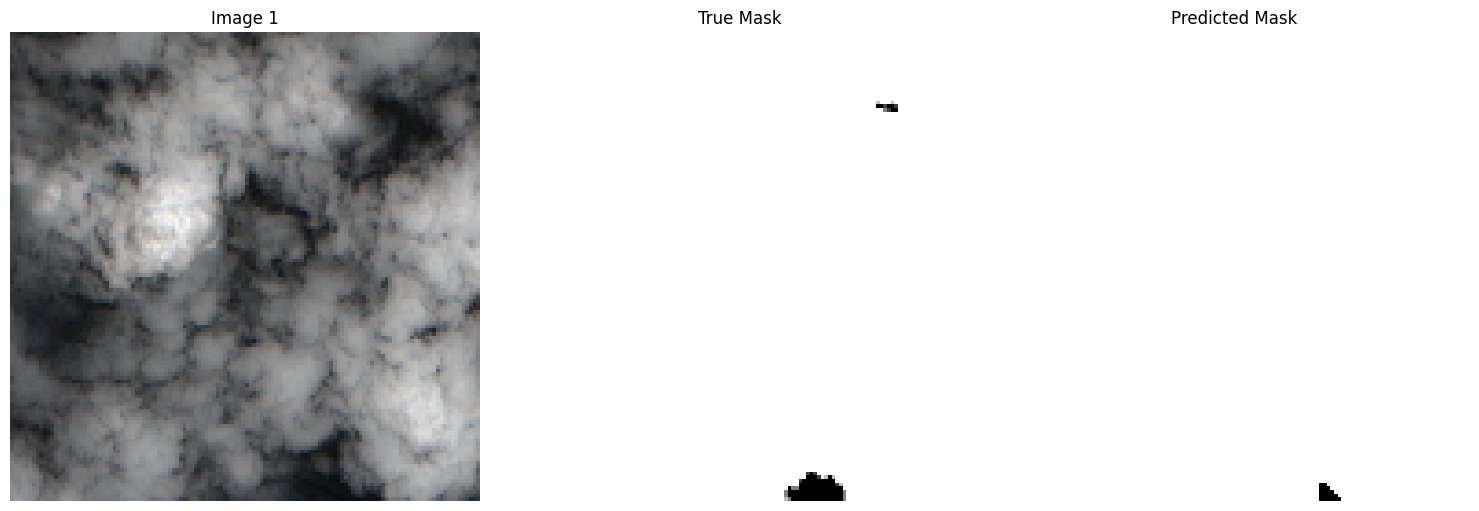

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


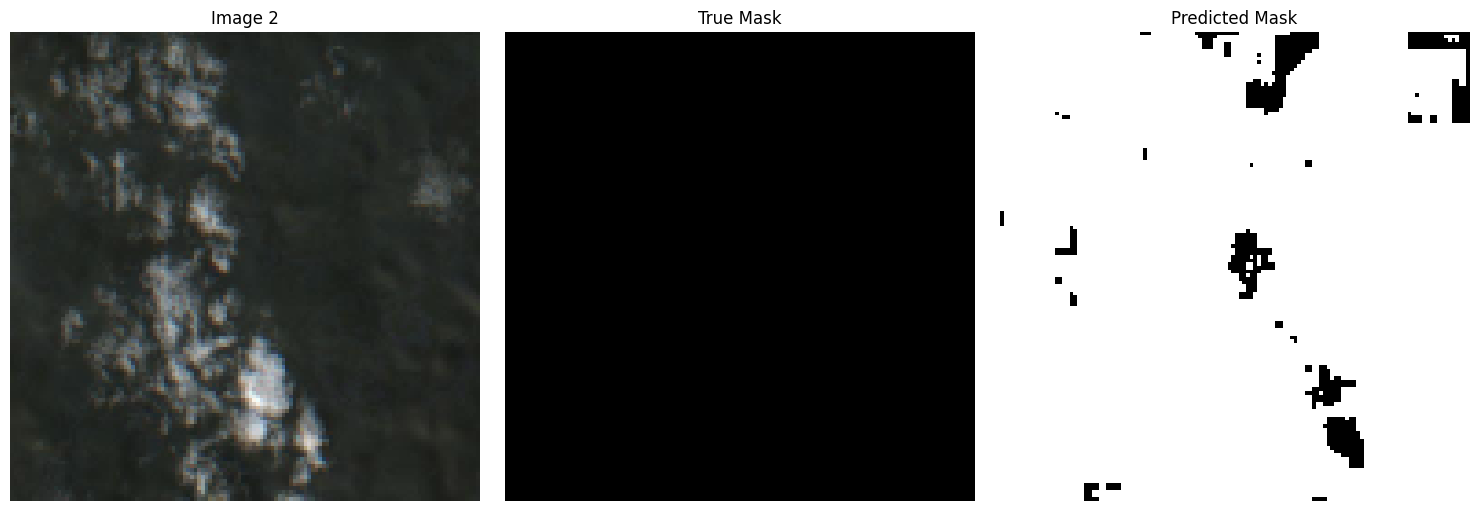

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


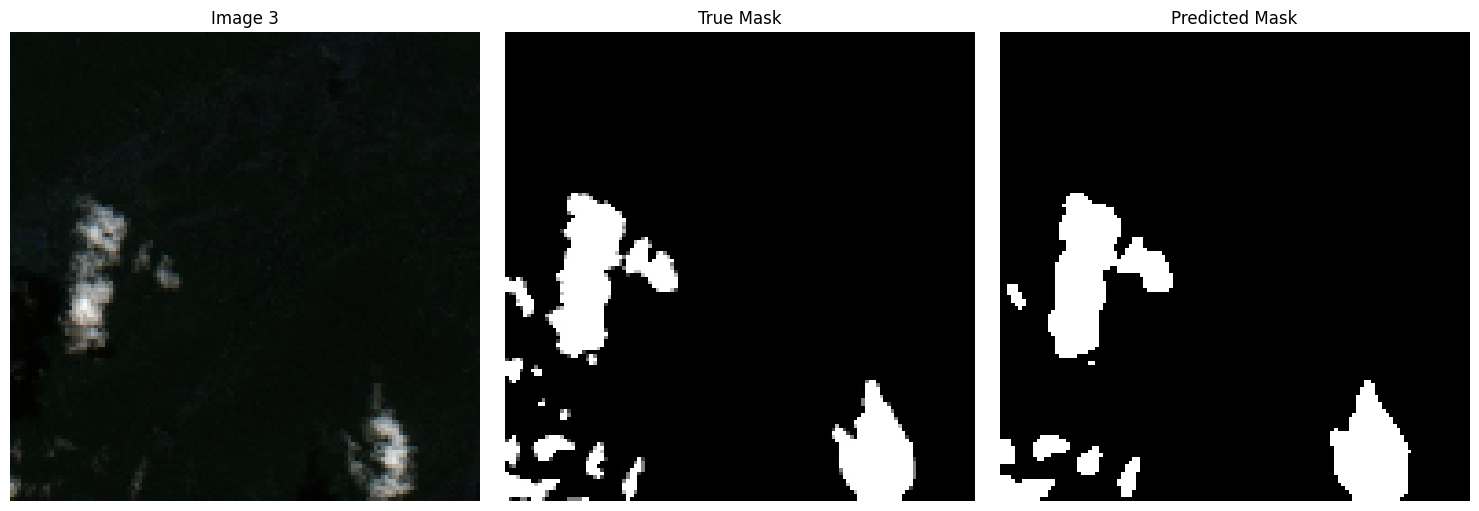

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


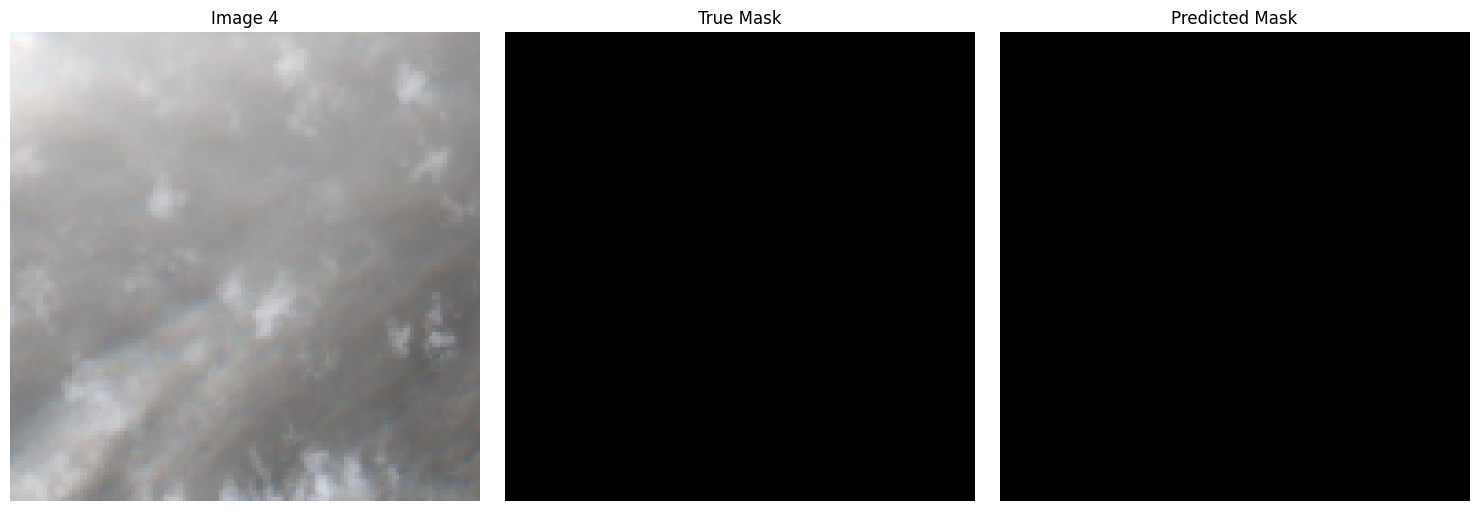

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


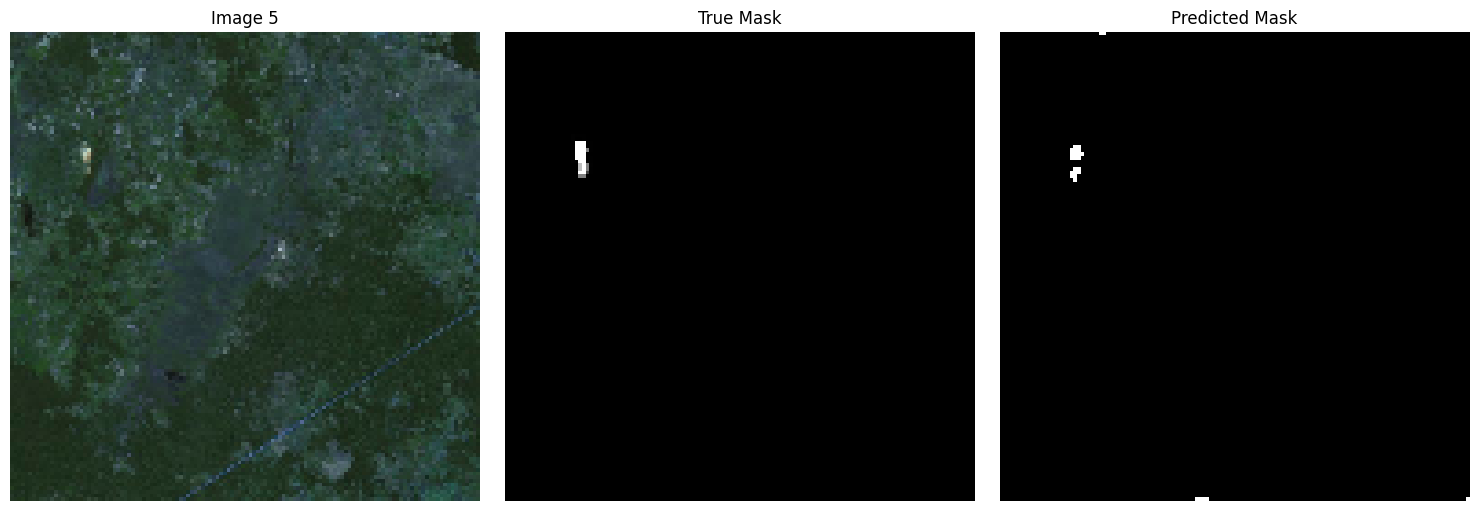

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(num_samples=5):
    for index in range(num_samples):
        image = X_val[index]
        true_mask = y_val[index]
        pred_mask = model.predict(np.expand_dims(image, axis=0))[0]

        plt.figure(figsize=(15, 5))

        # Display Image
        plt.subplot(1, 3, 1)
        plt.title(f"Image {index + 1}")
        plt.imshow(image)
        plt.axis('off')

        # Display True Mask
        plt.subplot(1, 3, 2)
        plt.title("True Mask")
        plt.imshow(true_mask.squeeze(), cmap='gray')
        plt.axis('off')

        # Display Predicted Mask
        plt.subplot(1, 3, 3)
        plt.title("Predicted Mask")
        plt.imshow((pred_mask.squeeze() > 0.5), cmap='gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

# Visualize 5 predictions
visualize_predictions(num_samples=5)


In [7]:
from sklearn.metrics import accuracy_score

def calculate_accuracy():
    # Get predictions for the validation set
    predictions = model.predict(X_val)
    
    # Convert predictions to binary (cloud or no cloud)
    binary_preds = (predictions > 0.5).astype(np.uint8)
    
    # Flatten both predicted and true masks for comparison
    flat_preds = binary_preds.flatten()
    flat_labels = y_val.flatten().astype(np.uint8)
    
    # Calculate accuracy
    accuracy = accuracy_score(flat_labels, flat_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate and print accuracy
calculate_accuracy()


74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step
Accuracy: 90.10%


In [8]:
# Save the model to a file (H5 format)
model.save('cloud_detection_model.keras')

print("Model saved successfully!")


Model saved successfully!


Total Cloud Pixels: 3242
Total Pixels: 16384
Cloud Coverage: 19.79%
Light clouds — image kept.


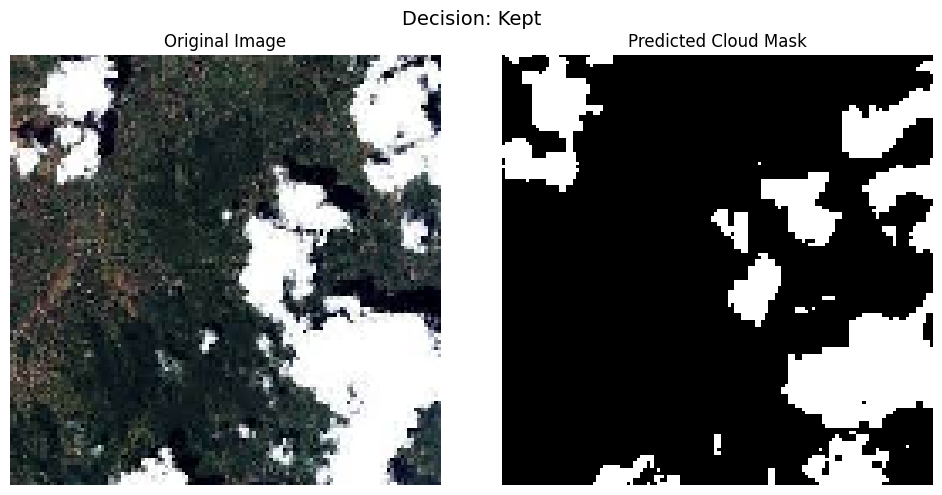

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import tensorflow as tf

# Load the trained model
model = load_model(r'C:\Users\USER\Desktop\Cloud-cnn\cloud_detection_model.keras')

# Step 0: Wrap model prediction in a tf.function to reduce retracing
@tf.function(reduce_retracing=True)
def predict_mask(input_tensor):
    return model(input_tensor, training=False)

def classify_filter_and_segment(image_path, threshold=0.5, cloud_threshold=0.5):
    """
    Predict the cloud mask, classify cloud intensity, and return both segmented mask and decision.
    """
    # Step 1: Read and preprocess image
    image_bgr = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (128, 128), interpolation=cv2.INTER_NEAREST)
    image_normalized = image_resized / 255.0
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_normalized, axis=0), dtype=tf.float32)

    # Step 2: Predict the cloud mask using the optimized predict function
    pred_mask = predict_mask(input_tensor)[0].numpy()
    binary_mask = (pred_mask > threshold).astype(np.uint8)

    # Step 3: Calculate cloud coverage
    cloud_pixels = np.sum(binary_mask)
    total_pixels = binary_mask.size
    cloud_coverage = cloud_pixels / total_pixels

    print(f"Total Cloud Pixels: {cloud_pixels}")
    print(f"Total Pixels: {total_pixels}")
    print(f"Cloud Coverage: {cloud_coverage * 100:.2f}%")

    # Step 4: Decision based on coverage
    if cloud_coverage >= cloud_threshold:
        print("Heavy clouds detected — image discarded.")
        decision = "discard"
    else:
        print("Light clouds — image kept.")
        decision = "keep"

    return decision, image_resized, binary_mask

# === Usage ===
image_path = r"C:\Users\USER\Downloads\img.jpg"  # Your image path
decision, processed_image, segmentation_mask = classify_filter_and_segment(image_path)

# === Display Output ===
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(processed_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask.squeeze(), cmap='gray')
plt.title("Predicted Cloud Mask")
plt.axis('off')

plt.suptitle(f"Decision: {'Kept' if decision == 'keep' else 'Discarded'}", fontsize=14)
plt.tight_layout()
plt.show()
